In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add to the list of cities
    if city not in cities:
        cities.append(city)
# Print the city count to determine sufficient count
len(cities)

605

In [43]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [44]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    


Processing Record 1 of Set 1 | tabou
Processing Record 2 of Set 1 | tyukhtet
Processing Record 3 of Set 1 | chincha alta
Processing Record 4 of Set 1 | harper
Processing Record 5 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | jacareacanga
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 13 of Set 1 | micheweni
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | manbij
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | kijini
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | bo rai
Processing Record 22 of Set 1 | san patricio
Processing Record 23 of Set 1 | dien bien
City n

Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | sonoita
Processing Record 42 of Set 4 | tazovskiy
Processing Record 43 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 4 | atuona
Processing Record 45 of Set 4 | heihe
Processing Record 46 of Set 4 | poum
Processing Record 47 of Set 4 | erdenet
Processing Record 48 of Set 4 | granada
Processing Record 49 of Set 4 | cazaje
City not found. Skipping...
Processing Record 50 of Set 4 | laramie
Processing Record 1 of Set 5 | toftir
City not found. Skipping...
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | mareeba
Processing Record 6 of Set 5 | mathura
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | santa lucia
Processing Record 9 of Set 5 | barrow
Pro

Processing Record 24 of Set 8 | mahon
Processing Record 25 of Set 8 | hualmay
Processing Record 26 of Set 8 | sadovoye
Processing Record 27 of Set 8 | kloulklubed
Processing Record 28 of Set 8 | bani
Processing Record 29 of Set 8 | bathsheba
Processing Record 30 of Set 8 | saquarema
Processing Record 31 of Set 8 | port-gentil
Processing Record 32 of Set 8 | porto velho
Processing Record 33 of Set 8 | kushalgarh
Processing Record 34 of Set 8 | ulaangom
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | ilebo
Processing Record 37 of Set 8 | amderma
City not found. Skipping...
Processing Record 38 of Set 8 | imbituba
Processing Record 39 of Set 8 | garowe
Processing Record 40 of Set 8 | kushmurun
Processing Record 41 of Set 8 | tucurui
Processing Record 42 of Set 8 | palampur
Processing Record 43 of Set 8 | borogontsy
Processing Record 44 of Set 8 | terenos
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | bonthe
Processing Record 47 

Processing Record 11 of Set 12 | araouane
Processing Record 12 of Set 12 | nouakchott
Processing Record 13 of Set 12 | puro
Processing Record 14 of Set 12 | balkanabat
Processing Record 15 of Set 12 | boa vista
Processing Record 16 of Set 12 | kutum
Processing Record 17 of Set 12 | cherskiy
Processing Record 18 of Set 12 | shenkursk
Processing Record 19 of Set 12 | tessalit
Processing Record 20 of Set 12 | yeniseysk
Processing Record 21 of Set 12 | estacion coahuila
Processing Record 22 of Set 12 | kodiak
Processing Record 23 of Set 12 | komsomolskiy
Processing Record 24 of Set 12 | san jose
Processing Record 25 of Set 12 | lovozero
Processing Record 26 of Set 12 | champoton
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | pimentel
Processing Record 29 of Set 12 | skerries
Processing Record 30 of Set 12 | shelburne
Processing Record 31 of Set 12 | touros
Processing Record 32 of Set 12 | matamoros
Processing Record 33 of Set 12 | devonport
Processing Record 34 o

In [54]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tabou,4.4230,-7.3528,83.25,78,89,10.13,CI,2022-04-05 17:56:16
1,Tyukhtet,56.5389,89.3011,38.48,87,100,7.83,RU,2022-04-05 17:56:17
2,Chincha Alta,-13.4099,-76.1323,70.39,67,35,8.50,PE,2022-04-05 17:56:17
3,Harper,4.3750,-7.7169,83.52,78,94,10.31,LR,2022-04-05 17:56:18
4,Albany,42.6001,-73.9662,57.63,42,49,5.01,US,2022-04-05 17:56:07
5,Pevek,69.7008,170.3133,-26.54,100,83,5.35,RU,2022-04-05 17:56:19
6,Port Alfred,-33.5906,26.8910,65.21,74,7,5.66,ZA,2022-04-05 17:56:19
7,Jacareacanga,-6.2222,-57.7528,88.63,55,74,4.85,BR,2022-04-05 17:56:19
8,Ponta Do Sol,32.6667,-17.1000,62.71,63,52,5.66,PT,2022-04-05 17:56:20
9,Tiksi,71.6872,128.8694,-18.44,100,100,1.79,RU,2022-04-05 17:56:20


In [55]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tabou,CI,2022-04-05 17:56:16,4.4230,-7.3528,83.25,78,89,10.13
1,Tyukhtet,RU,2022-04-05 17:56:17,56.5389,89.3011,38.48,87,100,7.83
2,Chincha Alta,PE,2022-04-05 17:56:17,-13.4099,-76.1323,70.39,67,35,8.50
3,Harper,LR,2022-04-05 17:56:18,4.3750,-7.7169,83.52,78,94,10.31
4,Albany,US,2022-04-05 17:56:07,42.6001,-73.9662,57.63,42,49,5.01
5,Pevek,RU,2022-04-05 17:56:19,69.7008,170.3133,-26.54,100,83,5.35
6,Port Alfred,ZA,2022-04-05 17:56:19,-33.5906,26.8910,65.21,74,7,5.66
7,Jacareacanga,BR,2022-04-05 17:56:19,-6.2222,-57.7528,88.63,55,74,4.85
8,Ponta Do Sol,PT,2022-04-05 17:56:20,32.6667,-17.1000,62.71,63,52,5.66
9,Tiksi,RU,2022-04-05 17:56:20,71.6872,128.8694,-18.44,100,100,1.79


In [56]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

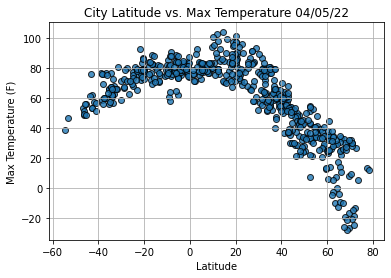

In [58]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

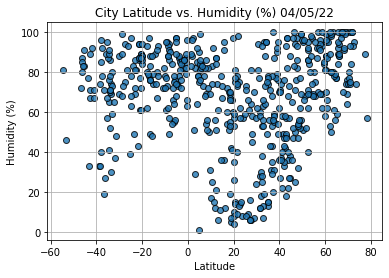

In [59]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

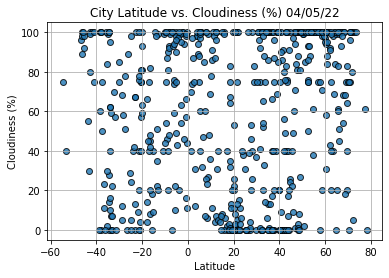

In [60]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

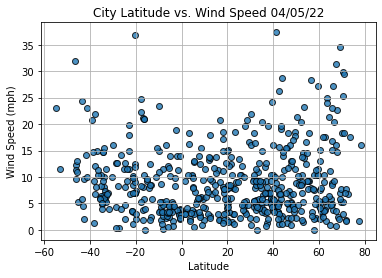

In [61]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tabou,CI,2022-04-05 17:56:16,4.4230,-7.3528,83.25,78,89,10.13
1,Tyukhtet,RU,2022-04-05 17:56:17,56.5389,89.3011,38.48,87,100,7.83
3,Harper,LR,2022-04-05 17:56:18,4.3750,-7.7169,83.52,78,94,10.31
4,Albany,US,2022-04-05 17:56:07,42.6001,-73.9662,57.63,42,49,5.01
5,Pevek,RU,2022-04-05 17:56:19,69.7008,170.3133,-26.54,100,83,5.35


In [75]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

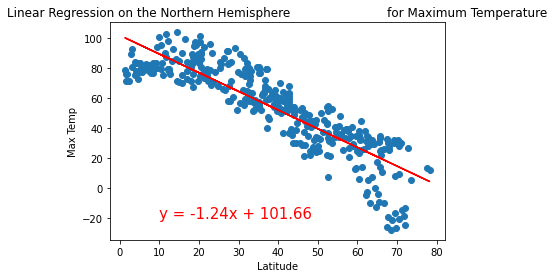

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

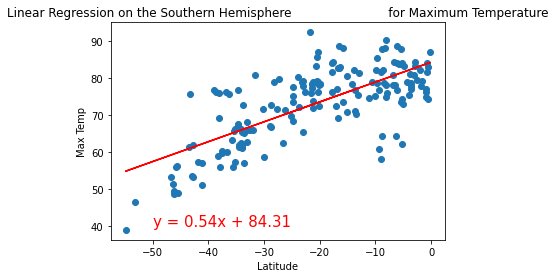

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,40))

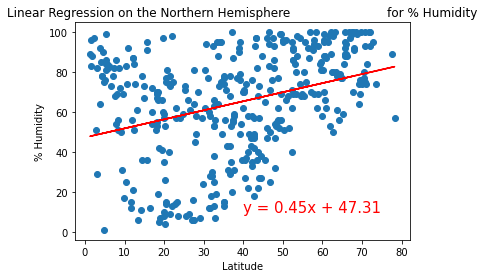

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

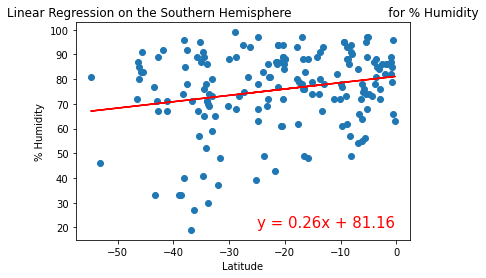

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,20))

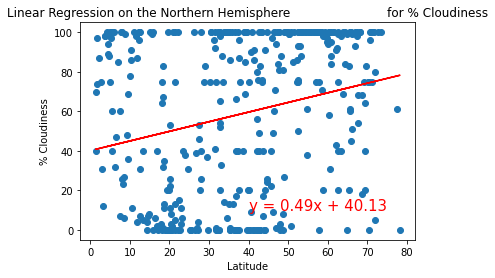

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

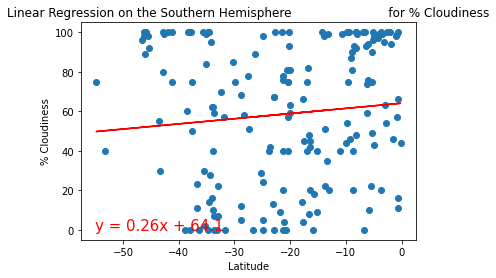

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,0))

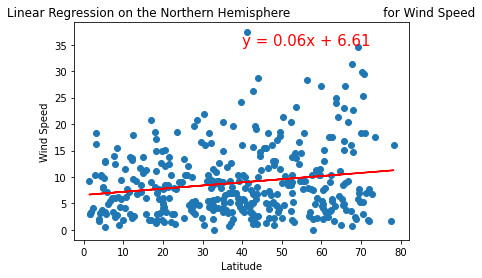

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

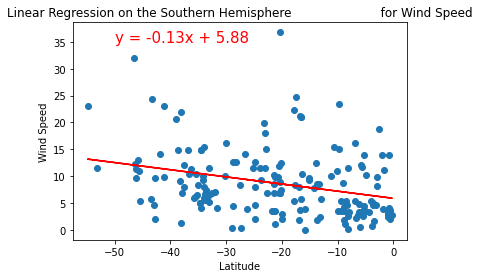

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed', (-50,35))